## Uslovna verovatnoća 

Često je potrebno odrediti verovatnoću određenih događaja, ako se zna (pod uslovom) da se dogodio neki drugi događaj. 
Npr. hoćemo da odredimo verovatnoću da će padati kiša određenog dana. Postoji puno faktora koji utiču na to, npr. određena vrsta oblaka se pokazala kao dobar indikator kiše. 

Postavlja se pitanje: kolika je verovatnoća kiše ako se zna da je prisutna određena vrsta oblaka? Ovakvim pitanjima se bavi oblast statistike za koju su koncepti uslovne verovatnoće i Bajesovo pravilo od ključne važnosti.

Radi ilustracije ovog koncepta, analiziraćemo skup podataka [student alcohol consumption](https://www.kaggle.com/uciml/student-alcohol-consumption/home). Videćemo da li možemo da donesemo neki zaključak o uspesima studenata u zavisnosti od vremena koje provedu učeći. 

Prvo ćemo koristiti skup `student-por.csv` gde ćemo izvući podatke o uspesima studenata na kursu Portugalskog jezika.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data_por = pd.read_csv("student-por.csv")
data_por.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

Koristićemo sada samo sledeća dva atributa (kolone):
- `G3` - zaključna ocena (numerička: od 0 do 20, izlazna promenljiva, "target")  
- `studytime` - vreme učenja nedeljno (numerička: 1 : < 2 sata, 2 : 2 do 5 sati, 3 : 5 do 10 sati, ili 4 : > 10 sati)  

In [2]:
atributi = ["G3","studytime"]
data_por = data_por[atributi]
data_por.head()

G3  studytime
0  11          2
1  11          2
2  12          2
3  14          3
4  13          2

Pre nego što probamo da pronađemo vezu između vremena učenja i ocena, sagledaćemo zasebno svaki atribut.

Vervatnoća da vreme učenja nekog studenta pripada određenom intervalu može se aproksimativno odrediti kao (statističko određivanje verovatnoće):

$$P(\text{T sati učenja}) = \frac{\text{Broj studenata koji uči T sati}}{\text{Ukupan broj studenata}}$$

Ovo je empirijska ocena - što je veći uzorak veća je preciznost, pod uslovom da je proces uzimanja uzorka bio pravilan.

In [3]:
data_temp = data_por["studytime"].value_counts()
data_temp

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

In [4]:
data_temp.sum()
data_por.index

RangeIndex(start=0, stop=649, step=1)

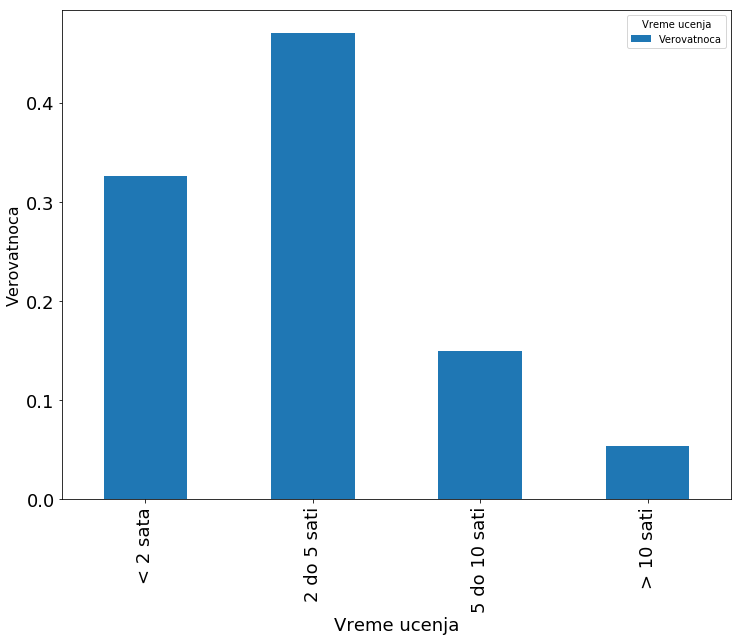

Vreme ucenja  Verovatnoca
< 2 sata         0.326656
2 do 5 sati      0.469954
5 do 10 sati     0.149461
> 10 sati        0.053929

In [5]:
P_vreme_ucenja = pd.DataFrame((data_temp/data_temp.sum()).sort_index())  # sort_index - sortira prema nazivu vrste  - indeksu
P_vreme_ucenja.index = ["< 2 sata","2 do 5 sati","5 do 10 sati","> 10 sati"]
P_vreme_ucenja.columns = ["Verovatnoca"]
P_vreme_ucenja.columns.name = "Vreme ucenja"

P_vreme_ucenja.plot.bar(figsize=(12,9),fontsize=18)
plt.ylabel("Verovatnoca",fontsize=16)
plt.xlabel("Vreme ucenja",fontsize=18)
plt.show()
P_vreme_ucenja

Nazvacemo ocenu vecu od 15 "visoka". Dakle, elementarni dogadjaji (elementi skupa $\Omega$) su "Visoka" i "Niska". Verovatnoca da student ima visoku ocenu moze se aproksimirati sa:

$$P(\text{visoka ocena}) = \frac{\text{Broj studenata sa visokom ocenom}}{\text{Ukupan broj studenata}}$$

Ocena   Verovatnoca
Niska      0.798151
Visoka     0.201849


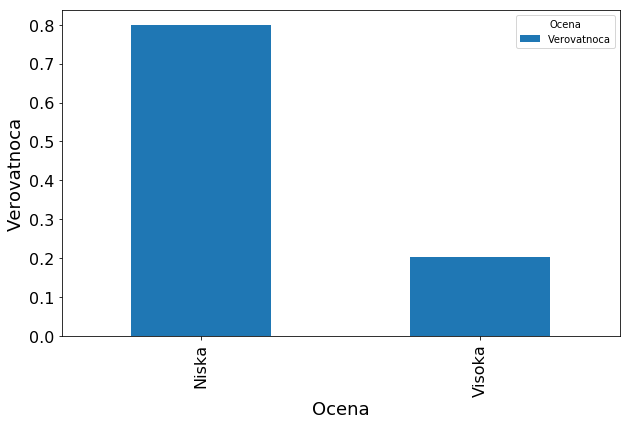

In [6]:
data_temp = (data_por["G3"]>=15).value_counts()
P_visoka = pd.DataFrame(data_temp/data_temp.sum())
P_visoka.index = ["Niska","Visoka"]
P_visoka.columns = ["Verovatnoca"]
P_visoka.columns.name = "Ocena"
print(P_visoka)
P_visoka.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Ocena",fontsize=18)
plt.ylabel("Verovatnoca",fontsize=18)
plt.show()

Sada nastavljamo sa interesantnijim opservacijama. Hoćemo da pronađemo verovatnoće vremena učenja, ako znamo da je student dobio visoku ocenu. Ovo računamo prema pravilima uslovne verovatnoće kao:

$$P(\text{vreme učenja T}\ |\ \text{visoka ocena})=\frac{\frac{\text{Broj studenata sa vremenom učenja T i visokom ocenom}}{\text{Ukupan broj studenata}}}{\frac{\text{Ukupan broj studenata sa visokom ocenom}}{\text{Ukupan broj studenata}}}$$

$$P(\text{vreme učenja T}\ |\ \text{visoka ocena})= \frac{\text{Broj studenata sa vremenom učenja T i visokom ocenom}}{\text{Ukupan broj studenata sa visokom ocenom}}$$

In [7]:
ocena = 15
data_temp = data_por.loc[data_por["G3"]>=ocena,"studytime"]  # Series objekat sa vremenima ucenja studenata koji su dobili visoku ocenu
print(data_temp)

8      2
14     3
15     1
31     2
32     2
42     2
47     4
51     2
56     2
57     2
59     2
60     2
61     1
65     2
69     4
87     3
101    3
104    2
113    1
116    2
117    1
128    1
139    3
181    2
183    2
185    2
188    2
196    2
198    2
201    2
      ..
439    1
448    3
450    2
456    2
472    1
499    1
509    2
510    2
516    2
517    1
525    3
533    2
546    2
549    2
594    2
595    1
596    2
606    4
611    3
615    2
617    3
618    2
620    2
623    3
630    3
634    2
636    2
638    2
641    3
645    2
Name: studytime, Length: 131, dtype: int64


In [8]:
data_temp.shape  # ukupan broj studenata sa visokom ocenom

(131,)

In [9]:
data_temp.value_counts()

2    67
3    32
1    22
4    10
Name: studytime, dtype: int64

Verovatnoca vremena ucenja pod uslovom da je student dobio visoku ocenu:


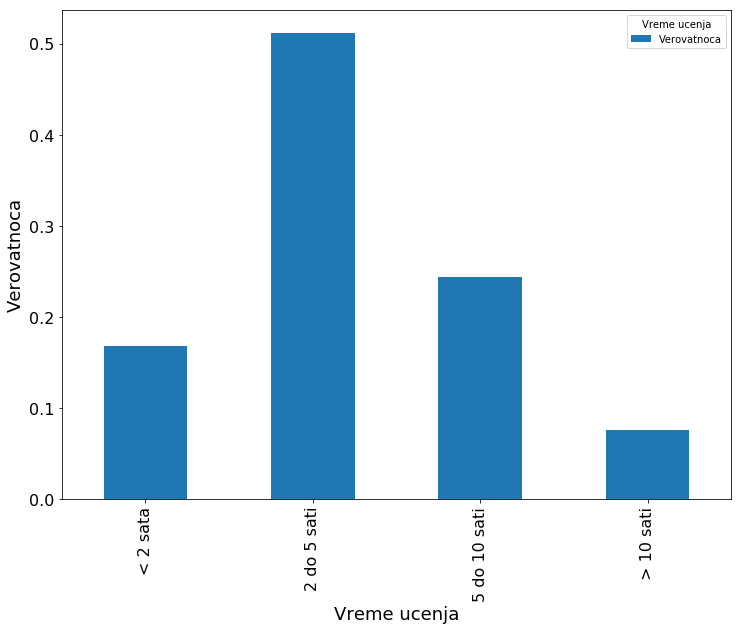

In [10]:
P_T_pod_usl_visoka_ocena= pd.DataFrame((data_temp.value_counts()/data_temp.shape[0]).sort_index())
P_T_pod_usl_visoka_ocena.index = ["< 2 sata","2 do 5 sati","5 do 10 sati","> 10 sati"]
P_T_pod_usl_visoka_ocena.columns = ["Verovatnoca"]
print("Verovatnoca vremena ucenja pod uslovom da je student dobio visoku ocenu:")
P_T_pod_usl_visoka_ocena.columns.name="Vreme ucenja"
P_T_pod_usl_visoka_ocena.plot(kind='bar',figsize=(12,9),fontsize=16)
plt.xlabel("Vreme ucenja",fontsize=18)
plt.ylabel("Verovatnoca",fontsize=18)
plt.show()

Gornje verovatnoće smo mogli da odredimo jer smo imali podatke o rezultatima studenata.

Možemo da rezonujemo i na obrnut način: Hoćemo da predvidimo verovatnoću da će student dobiti visoku ocenu pod uslovom da su učili određeno vreme. Za računanje ovoga mozemo koristiti Bajesovo pravilo: 

$$P(\text{visoka ocena}\ |\  \text{vreme ucenja})=\frac{P(\text{vreme_ucenja}\ |\ \text{visoka_ocena})P(\text{visoka ocena})}{P(\text{vreme_ucenja})}$$

Verovatnoca visoke ocene pod uslovom da je dato vreme ucenja:


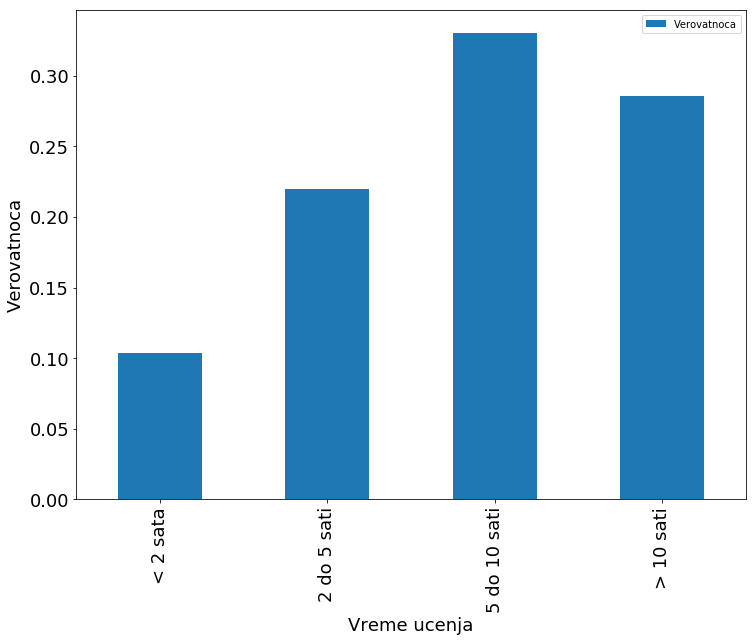

In [12]:
P_visoka_pod_usl_T = P_T_pod_usl_visoka_ocena * P_visoka.loc["Visoka"] / P_vreme_ucenja
print("Verovatnoca visoke ocene pod uslovom da je dato vreme ucenja:")
pd.DataFrame(P_visoka_pod_usl_T).plot.bar(figsize=(12,9),fontsize=18).legend(loc="best") # pravimo DataFrame, koji plotujemo pomocu .bar()
plt.xlabel("Vreme ucenja",fontsize=18)
plt.ylabel("Verovatnoca",fontsize=18)
plt.show()

## Vežbanje 1

Isto uraditi na skupu 'student-mat.csv' (uspesi studenata iz matematike).

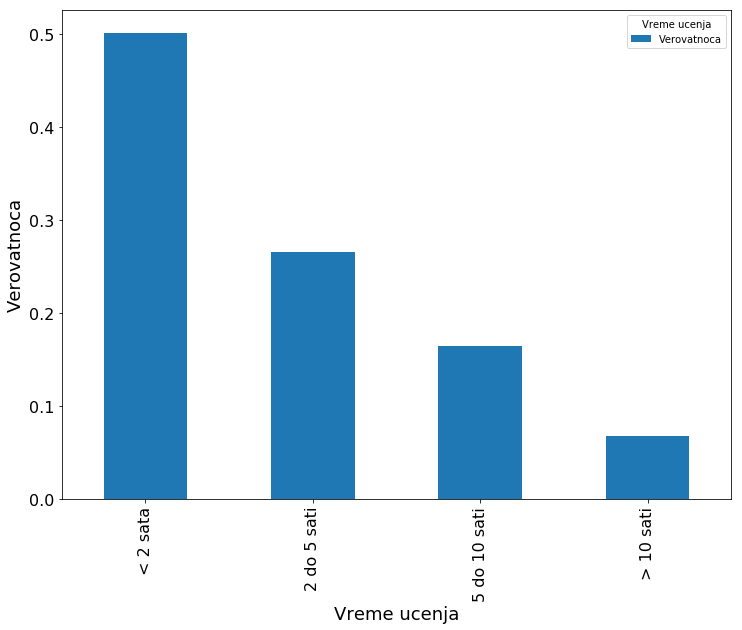

In [13]:
data_math = pd.read_csv("student-mat.csv")
data_temp = data_math["studytime"].value_counts()
P_vreme_ucenja_m = pd.DataFrame(data_temp/data_temp.sum())
P_vreme_ucenja_m.index = ["< 2 sata","2 do 5 sati","5 do 10 sati","> 10 sati"]
P_vreme_ucenja_m.columns = ["Verovatnoca"]
P_vreme_ucenja_m.columns.name = "Vreme ucenja"
P_vreme_ucenja_m.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Vreme ucenja",fontsize=18)
plt.ylabel("Verovatnoca",fontsize=18)
plt.show()

## Vežbanje 2

Date su dve kutije $A$ i $B$. U kutiji $A$ nalazi se $c_A$ crvenih kuglica i $b_A$ belih kuglica. Kutija $B$ ima $c_B$ crvenih i $b_B$ belih kuglica. Slučajno se bira jedna kutija, a zatim se slučajno bira jedna kuglica iz izabrane kutije. Napisati program koji računa uslovnu verovatnoću (teorijski, kao i statistički - generisati veliki broj uzoraka) da slučajno izabrana kuglica pripada kutiji $A$ pod uslovom da se zna da je bela. 